In [2]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns # Visualisation

%matplotlib inline
sns.set(color_codes=True)
# create tables
from tabulate import tabulate

# libraries for calculations & analysis
import statistics
import pylab
from scipy import stats

In [3]:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
uploaded_df = pd.read_csv(file_path)

In [4]:
uploaded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9487 entries, 0 to 9486
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             9487 non-null   int64  
 1   Material               9487 non-null   int64  
 2   BATCHID                9487 non-null   int64  
 3   Tank_1                 9487 non-null   int64  
 4   Instruction_Step       9462 non-null   object 
 5   INGRED_ID              2443 non-null   object 
 6   INGRED_Name            1980 non-null   object 
 7   Quantity               9487 non-null   float64
 8   Phase_start            9487 non-null   object 
 9   Phase_end              9487 non-null   object 
 10  Phase_duration         9487 non-null   int64  
 11  Phase_start_delay      9487 non-null   int64  
 12  Phase_row_no           9487 non-null   int64  
 13  Flowrate_KGMIN         9487 non-null   float64
 14  Target_Flowrate        3108 non-null   float64
 15  Targ

In [5]:
#Aggregate data per tank
aggregated_ProductionTank2202_df1 = uploaded_df.groupby(['Tank_1','Material','BATCHID']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'mean',
    'Phase_start_delay':'mean',
    #'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_ProductionTank2202_df1)

     Tank_1  Material    BATCHID  Phase_duration  Phase_overrun  \
0      2201   1397022  107956670             215       3.333333   
1      2201   1397022  107969769             122       4.000000   
2      2201   1397022  108015839             110       0.333333   
3      2201   1428047  107907563             105       0.000000   
4      2201   1428047  107993270              83       0.000000   
..      ...       ...        ...             ...            ...   
844    2604   1985101  107734265             167       0.000000   
845    2604   1985101  107759327             430      18.333333   
846    2604   1985101  107795797             222       2.250000   
847    2604   1985101  107956532             519      25.750000   
848    2604   1985101  108081814             336      10.500000   

     Phase_start_delay  Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
0             0.600000        209.1209              44.000000       237.850400  
1             0.600000        184

In [6]:
# Group data by tank names and calculate average Quantity
grouped_df = uploaded_df.groupby('Tank_1')['Phase_overrun'].sum().reset_index()
grouped_df

,Tank_1,Phase_overrun
0,2201,298.0
1,2202,7430.0
2,2203,10090.0
3,2204,9613.0
4,2205,1757.0
5,2301,5700.0
6,2302,10272.0
7,2303,1536.0
8,2304,10779.0
9,2305,11416.0


In [10]:
## Determining the Tank Quantities available 

In [7]:
#Select all the rows where the phase HP is in the list below - HP is homogenisation of the final batch quantity
Instruction_Step = ['HP']
df_TankQuantity = uploaded_df[uploaded_df['Instruction_Step'].isin(Instruction_Step)]
print(df_TankQuantity)

      Unnamed: 0  Material    BATCHID  Tank_1 Instruction_Step INGRED_ID  \
11            11   1002150  107643491    2503               HP       NaN   
16            16   1002150  107643491    2504               HP       NaN   
38            38   1002150  107762133    2503               HP       NaN   
43            43   1002150  107762133    2504               HP       NaN   
65            65   1002150  107829859    2504               HP       NaN   
...          ...       ...        ...     ...              ...       ...   
9424        9424   3044756  107940278    2504               HP       NaN   
9446        9446   3044756  108041496    2504               HP       NaN   
9451        9451   3044756  108041496    2503               HP       NaN   
9474        9474   3055706  107737576    2502               HP       NaN   
9479        9479   3055706  107737576    2501               HP       NaN   

     INGRED_Name     Quantity       Phase_start         Phase_end  \
11           NaN  

In [8]:
import pandas as pd
from scipy import stats
tank_data = ['2202','2203','2204','2302','2304','2305','2501','2502','2503','2504','2601']
# Filter the DataFrame based on Tank_1 values
filtered_df = df_TankQuantity[df_TankQuantity['Tank_1'].isin(tank_data)]

# Group by Tank_1 and calculate mean phase overrun
grouped = filtered_df.groupby('Tank_1')['Phase_overrun'].sum()

# Perform t-test for each INGRED_ID
for ingred_id in grouped.index:
    ingred_data = filtered_df[filtered_df['Tank_1'] == ingred_id]['Phase_overrun']
    t_statistic, p_value = stats.ttest_1samp(ingred_data, grouped[ingred_id])
    print(f"Tank_1: {ingred_id}")
    print(f"Mean Phase Overrun: {grouped[ingred_id]:.2f}")
    print(f"T-Statistic: {t_statistic:.2f}")
    print(f"P-Value: {p_value:.4f}")
    print("-" * 30)
    if p_value < 0.05:
        print(f"The difference in Phase_overrun for Tank {Tank_1} and other tanks is statistically significant.\n")
    else:
        print(f"There is no statistically significant difference in Phase_overrun for Tank {Tank_1} and other tanks.\n")

In [9]:
# Group data by tank names and calculate average Quantity
TankQuantity_df = df_TankQuantity.groupby('Tank_1')['Quantity'].mean().reset_index()
TankQuantity_df

,Tank_1,Quantity
0,2201,18258.020125
1,2202,17442.148714
2,2203,17516.904545
3,2204,18313.822955
4,2205,16892.826667
5,2301,18317.464529
6,2302,18748.671826
7,2303,18633.034176
8,2304,18625.372000
9,2305,18769.750146


### Determining the effect of Tank Quantity on the Phase Overrun times per Production Tank¶

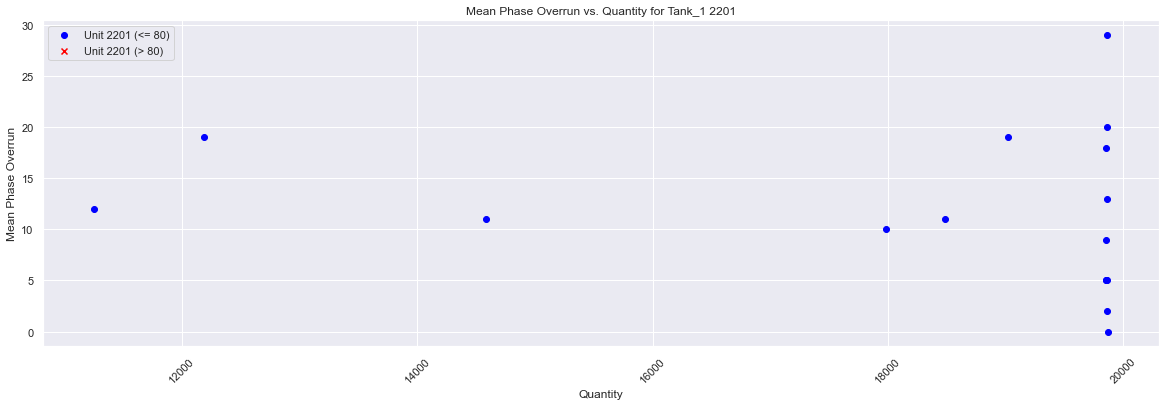

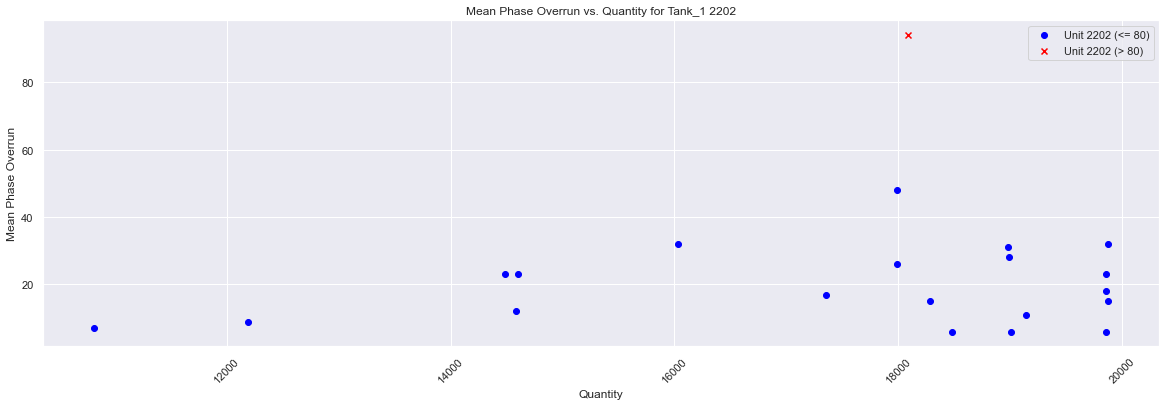

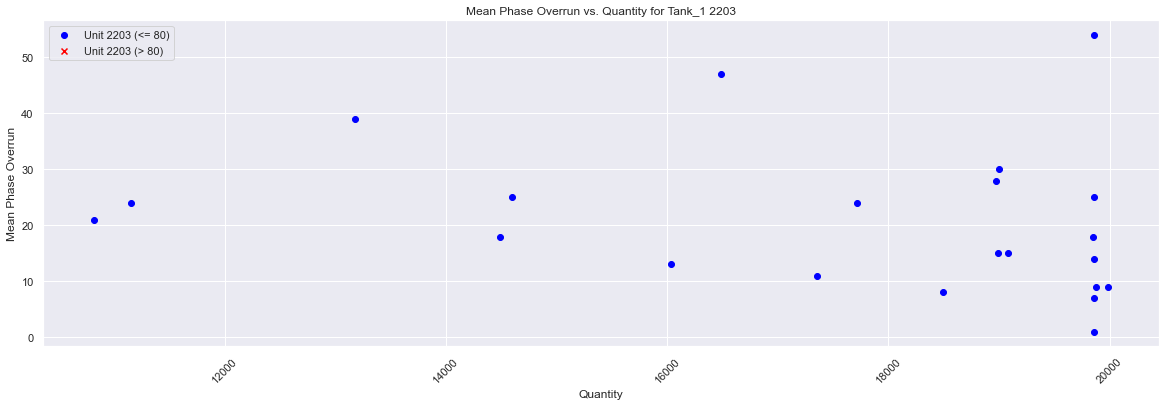

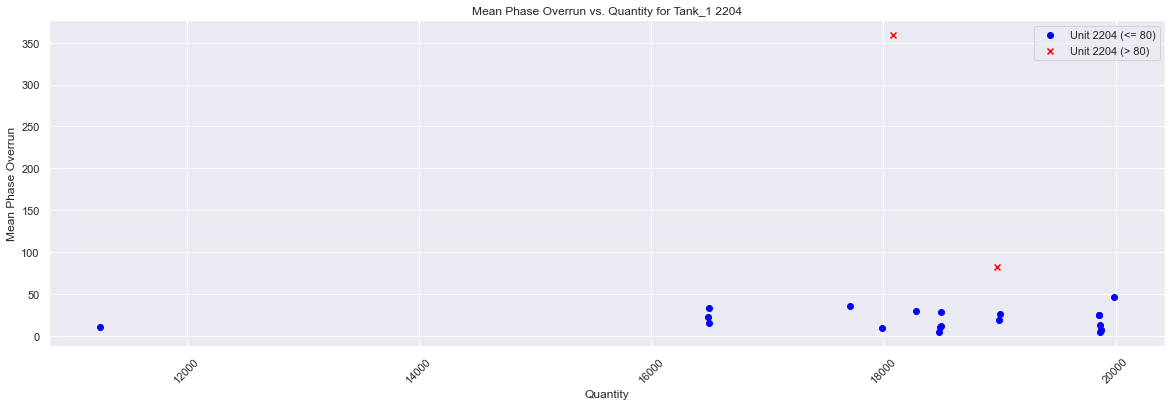

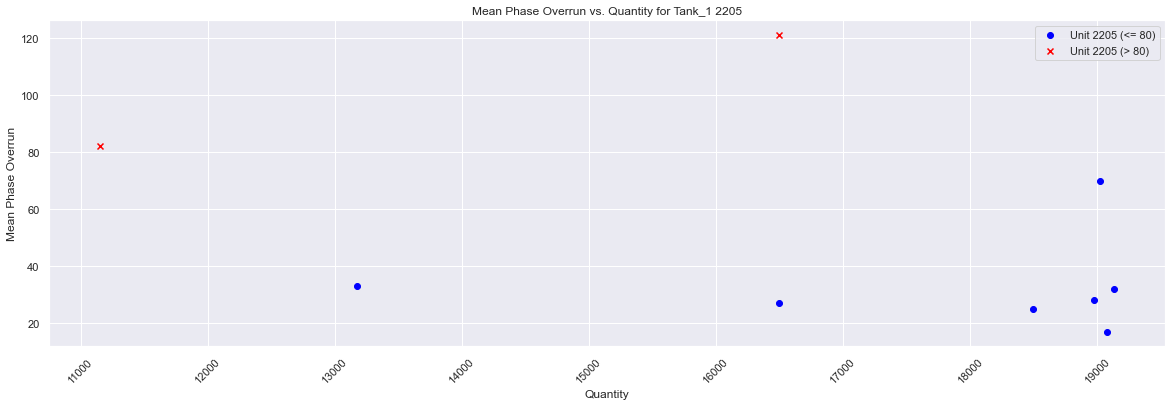

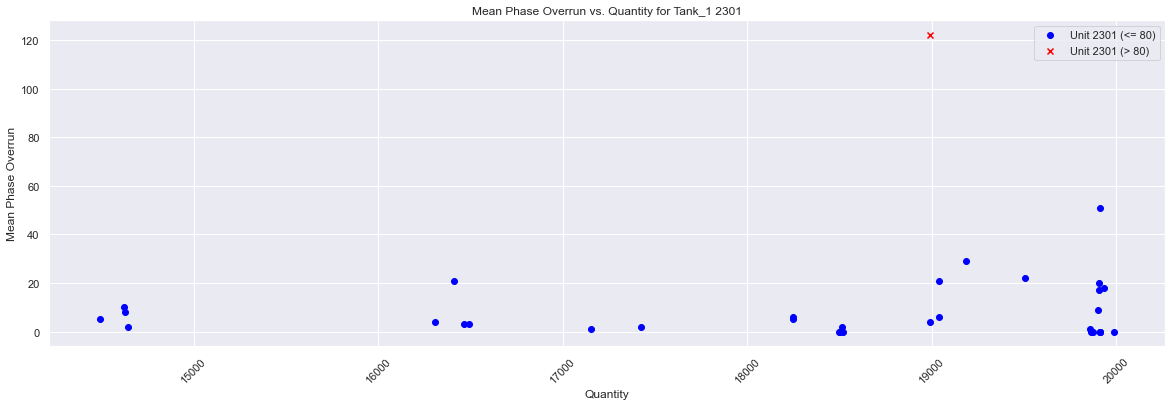

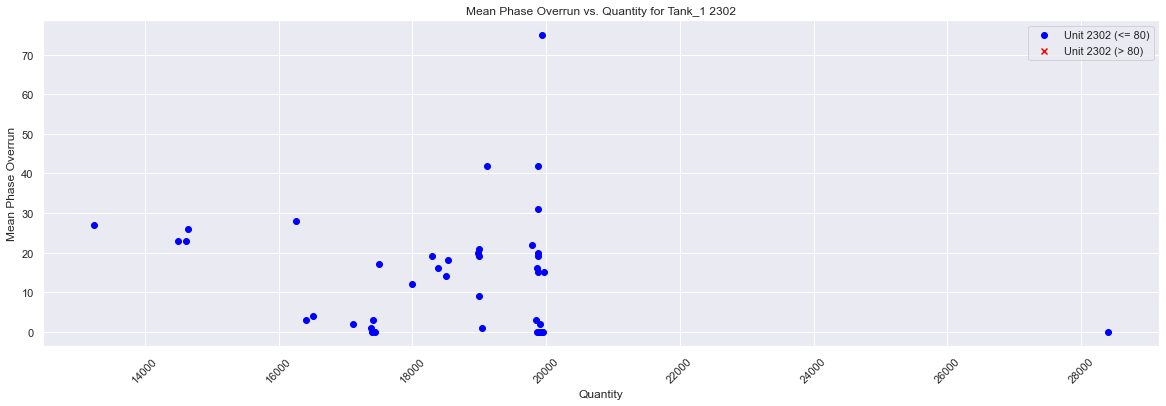

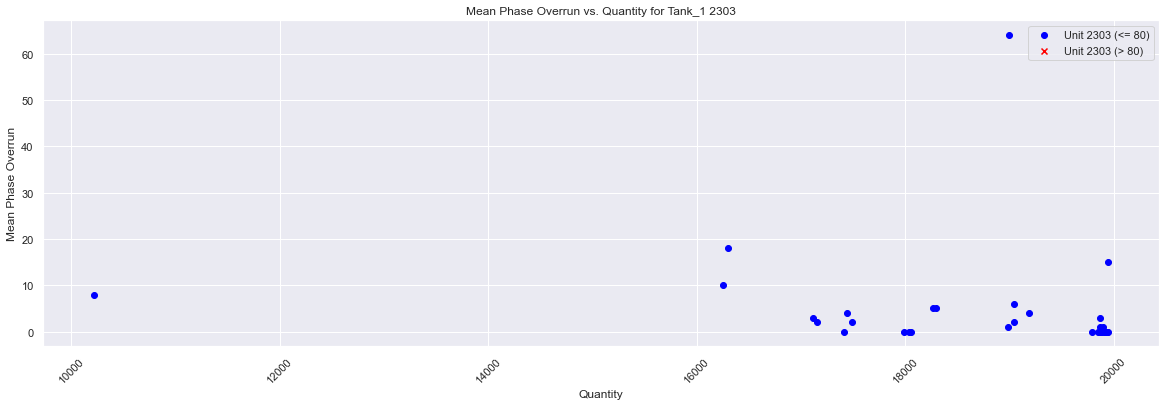

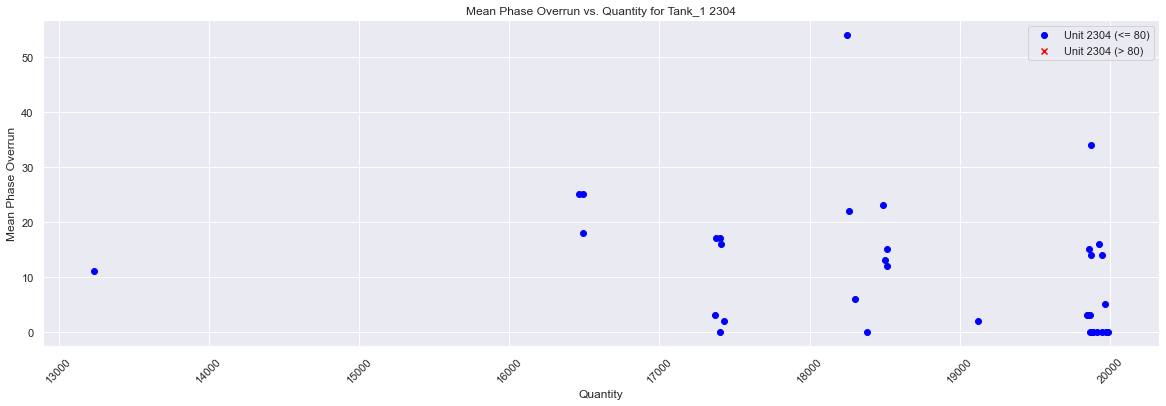

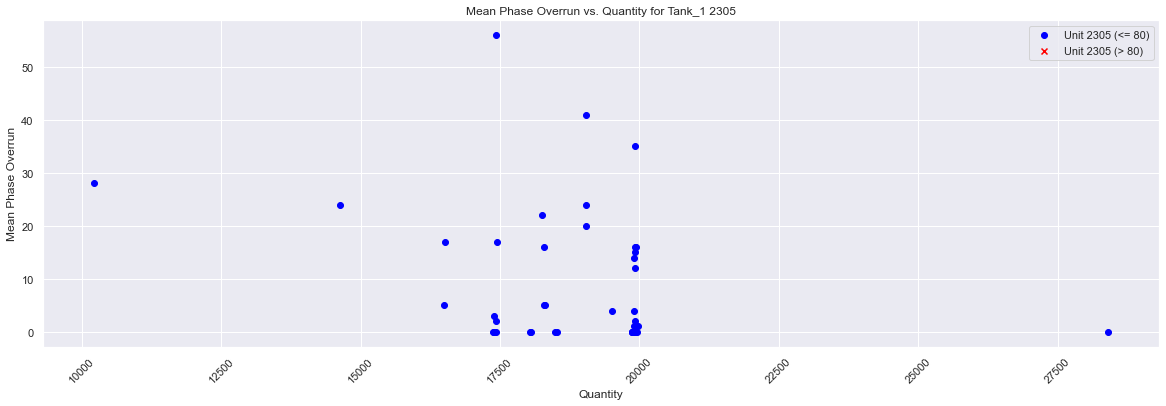

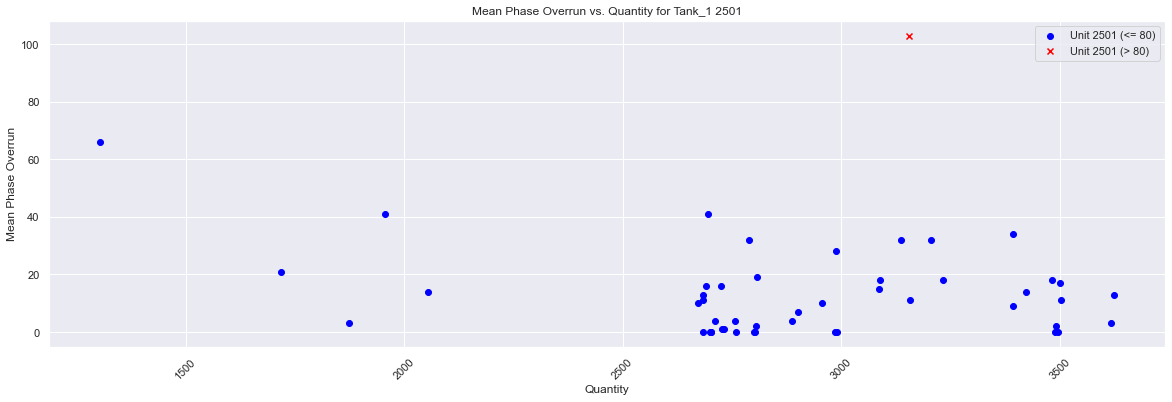

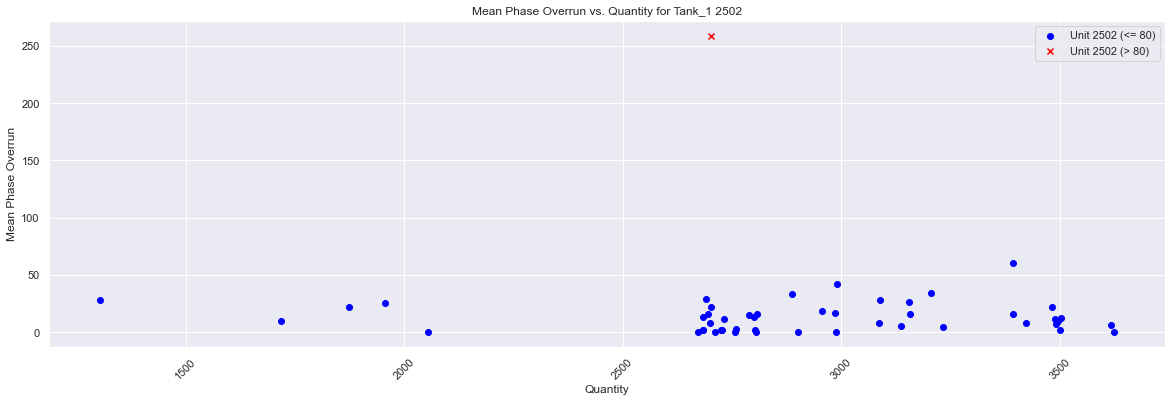

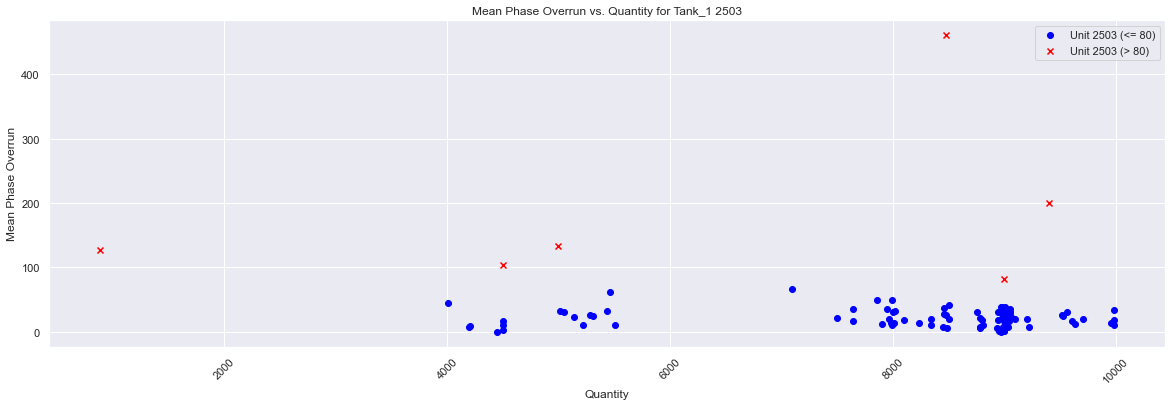

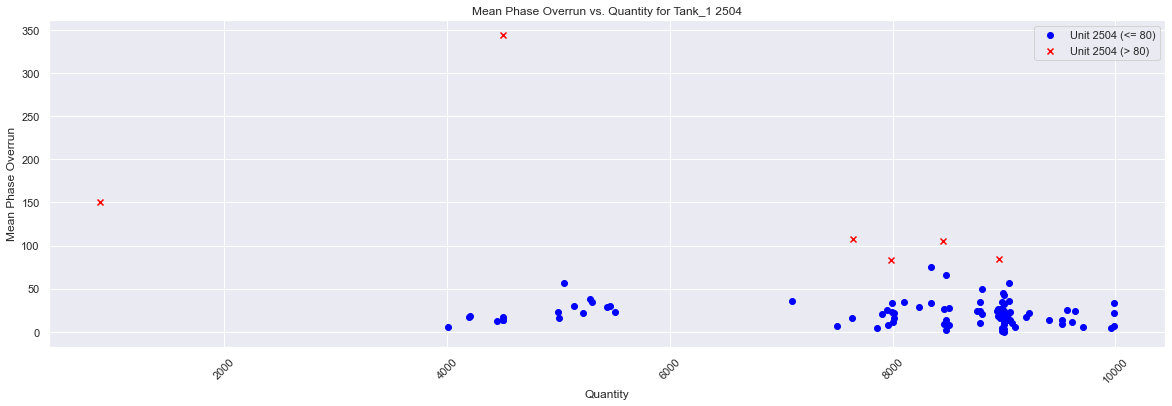

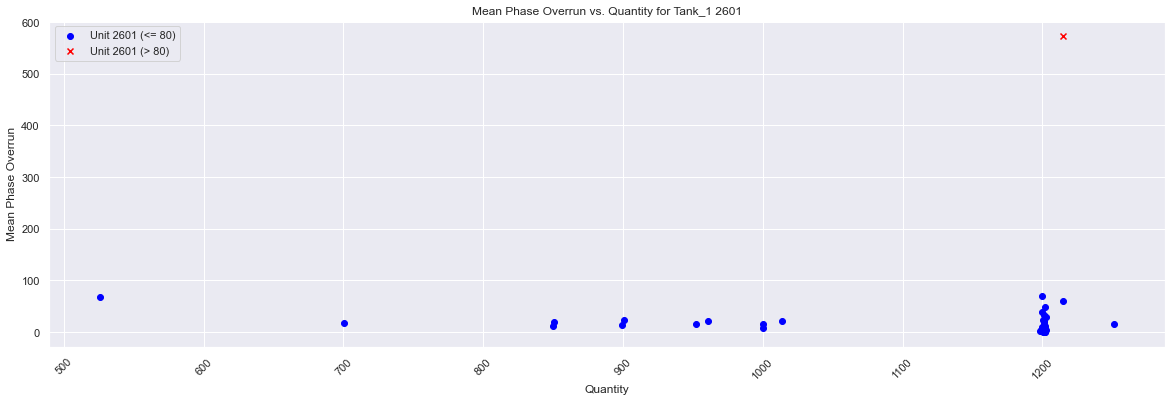

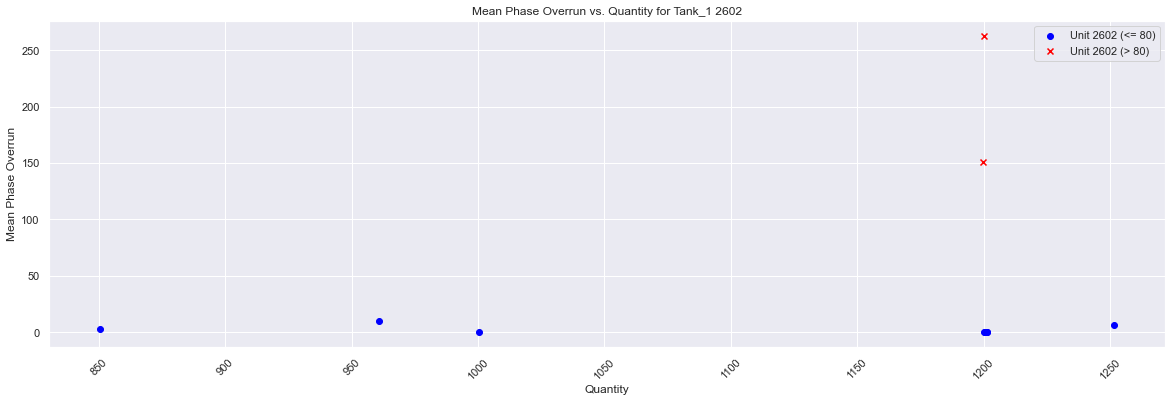

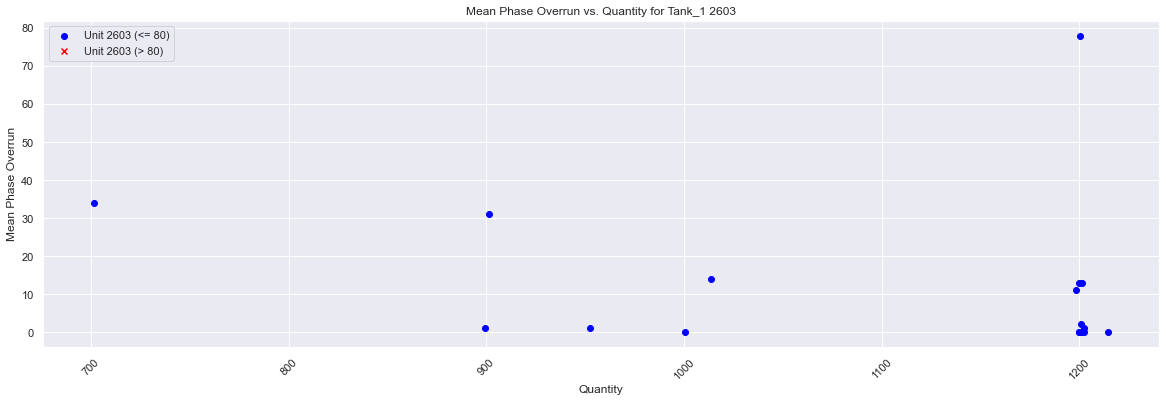

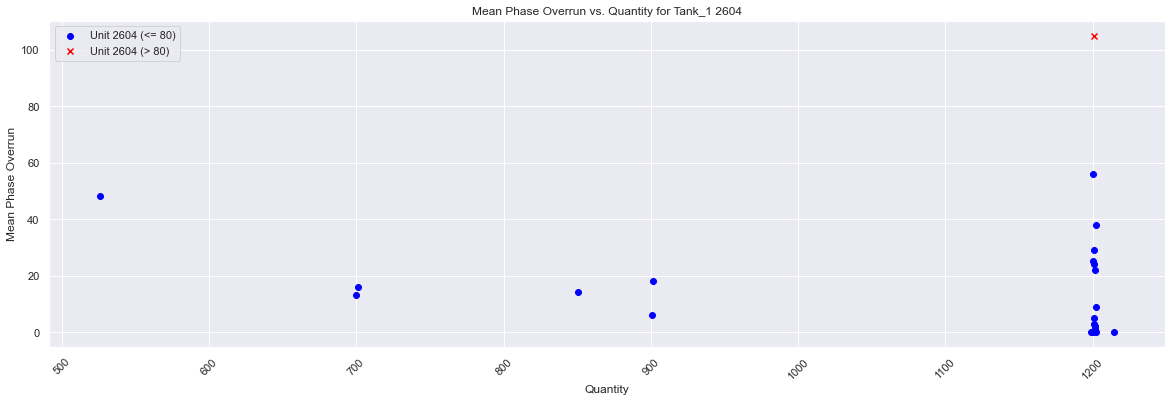

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(df_TankQuantity)

# Group data by 'unit' and calculate the mean phase overrun for each unit and material combination
grouped_data = df.groupby(['Tank_1','Quantity'])['Phase_overrun'].mean().reset_index()

# Define the threshold value above which points will be colored differently
threshold = 80  # Adjust this value as needed

# Create a separate plot for each unit
units = grouped_data['Tank_1'].unique()
for Unit in units:
    unit_data = grouped_data[grouped_data['Tank_1'] == Unit]
    
    plt.figure(figsize=(20, 6))
    
    # Scatter plot for points below threshold
    plt.scatter(unit_data[unit_data['Phase_overrun'] <= threshold]['Quantity'],
                unit_data[unit_data['Phase_overrun'] <= threshold]['Phase_overrun'],
                label=f'Unit {Unit} (<= {threshold})', color='blue')
    
    # Scatter plot for points above threshold
    plt.scatter(unit_data[unit_data['Phase_overrun'] > threshold]['Quantity'],
                unit_data[unit_data['Phase_overrun'] > threshold]['Phase_overrun'],
                label=f'Unit {Unit} (> {threshold})', color='red', marker='x')
    
    plt.xlabel('Quantity')
    plt.ylabel('Mean Phase Overrun')
    plt.title(f'Mean Phase Overrun vs. Quantity for Tank_1 {Unit}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

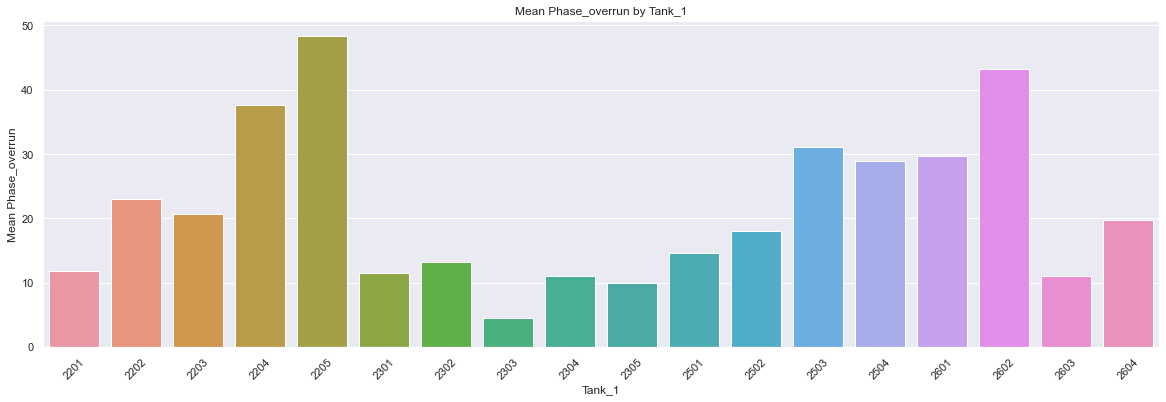

In [15]:
# Aggregated Bar Plot
plt.figure(figsize=(20, 6))
agg_df = df_TankQuantity.groupby('Tank_1')['Phase_overrun'].mean().reset_index()
sns.barplot(data=agg_df, x='Tank_1', y='Phase_overrun')
plt.xticks(rotation=45)
plt.xlabel('Tank_1')
plt.ylabel('Mean Phase_overrun')
plt.title('Mean Phase_overrun by Tank_1')
plt.show()

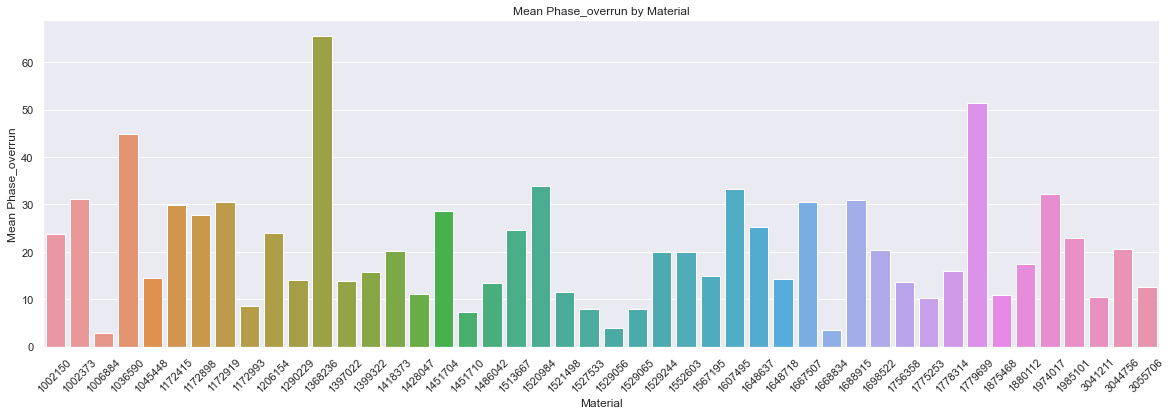

In [16]:
# Aggregated Bar Plot
plt.figure(figsize=(20, 6))
agg_df = df_TankQuantity.groupby('Material')['Phase_overrun'].mean().reset_index()
sns.barplot(data=agg_df, x='Material', y='Phase_overrun')
plt.xticks(rotation=45)
plt.xlabel('Material')
plt.ylabel('Mean Phase_overrun')
plt.title('Mean Phase_overrun by Material')
plt.show()

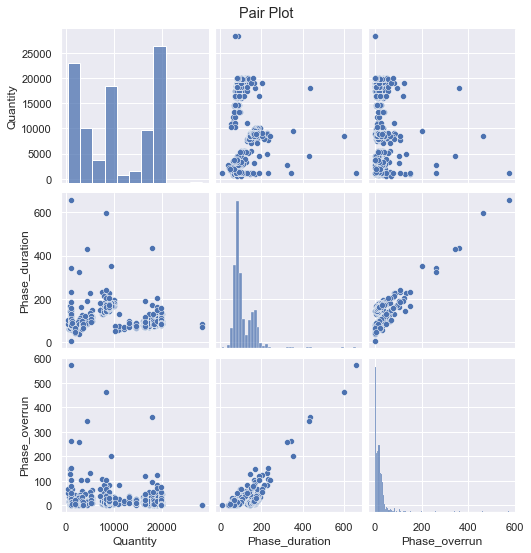

In [17]:
# Pair Plot (Scatter Matrix)
sns.pairplot(df_TankQuantity[['Quantity', 'Phase_duration', 'Phase_overrun']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()

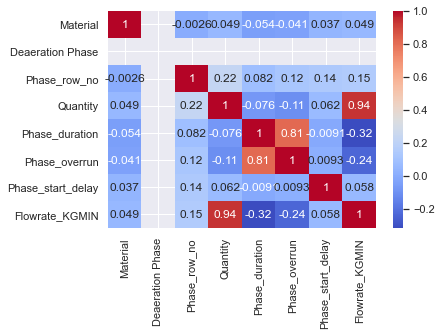

In [11]:
numeric_columns = ['Material','Deaeration Phase','Phase_row_no','Quantity','Phase_duration', 'Phase_overrun', 'Phase_start_delay','Flowrate_KGMIN']
correlation_matrix = df_TankQuantity[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [18]:
df_TankQuantity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 11 to 9479
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             665 non-null    int64  
 1   Material               665 non-null    int64  
 2   BATCHID                665 non-null    int64  
 3   Tank_1                 665 non-null    int64  
 4   Instruction_Step       665 non-null    object 
 5   INGRED_ID              0 non-null      object 
 6   INGRED_Name            0 non-null      object 
 7   Quantity               665 non-null    float64
 8   Phase_start            665 non-null    object 
 9   Phase_end              665 non-null    object 
 10  Phase_duration         665 non-null    int64  
 11  Phase_start_delay      665 non-null    int64  
 12  Phase_row_no           665 non-null    int64  
 13  Flowrate_KGMIN         665 non-null    float64
 14  Target_Flowrate        665 non-null    float64
 15  Targ

In [19]:
df_TankQuantity.head()

,Unnamed: 0,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
11,11,1002150,107643491,2503,HP,NaN,NaN,8980.695,10/03/2022 04:12,10/03/2022 07:15,183,6,12,49.0748,61.9455,145,38.0,0
16,16,1002150,107643491,2504,HP,NaN,NaN,8980.695,10/03/2022 19:25,10/03/2022 21:54,149,2,5,60.2731,61.9455,145,4.0,0
38,38,1002150,107762133,2503,HP,NaN,NaN,8979.430,31/05/2022 02:45,31/05/2022 05:45,180,4,15,49.8857,61.9455,145,35.0,0
43,43,1002150,107762133,2504,HP,NaN,NaN,8979.430,31/05/2022 06:34,31/05/2022 09:33,179,1,5,50.1644,61.9455,145,34.0,0
65,65,1002150,107829859,2504,HP,NaN,NaN,8995.911,21/07/2022 22:44,22/07/2022 01:27,163,4,15,55.1896,61.9455,145,18.0,0


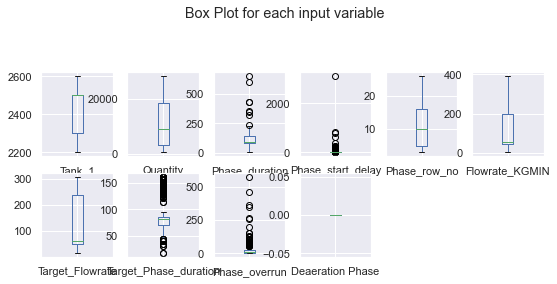

In [12]:
df_TankQuantity.drop(['Unnamed: 0','Material','BATCHID','Instruction_Step','INGRED_ID','INGRED_Name',], axis=1).plot(kind='box', subplots=True, layout=(5,6), sharex=False, sharey=False, figsize=(9,9),title='Box Plot for each input variable')
plt.show()

In [13]:
# Define columns where you want to detect and remove outliers
df_TankQuantity1 = pd.DataFrame(df_TankQuantity)
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration', 'Target_Flowrate']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
    df_TankQuantity1 = remove_outliers_iqr(df_TankQuantity1, col)

# Display the cleaned DataFrame
print(df_TankQuantity1)

      Unnamed: 0  Material    BATCHID  Tank_1 Instruction_Step INGRED_ID  \
172          172   1002373  107591591    2504               HP       NaN   
177          177   1002373  107591591    2503               HP       NaN   
199          199   1002373  107837369    2504               HP       NaN   
204          204   1002373  107837369    2503               HP       NaN   
230          230   1002373  107959479    2504               HP       NaN   
...          ...       ...        ...     ...              ...       ...   
9290        9290   3044756  107815341    2501               HP       NaN   
9312        9312   3044756  107858284    2501               HP       NaN   
9317        9317   3044756  107858284    2502               HP       NaN   
9474        9474   3055706  107737576    2502               HP       NaN   
9479        9479   3055706  107737576    2501               HP       NaN   

     INGRED_Name     Quantity       Phase_start         Phase_end  \
172          NaN  

In [14]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN','Quantity']
df_TankQuantity1[numerical_cols] = scaler.fit_transform(df_TankQuantity1[numerical_cols])
print(df_TankQuantity1.head())

     Unnamed: 0  Material    BATCHID  Tank_1 Instruction_Step INGRED_ID  \
172         172   1002373  107591591    2504               HP       NaN   
177         177   1002373  107591591    2503               HP       NaN   
199         199   1002373  107837369    2504               HP       NaN   
204         204   1002373  107837369    2503               HP       NaN   
230         230   1002373  107959479    2504               HP       NaN   

    INGRED_Name  Quantity       Phase_start         Phase_end  Phase_duration  \
172         NaN -0.810407  31/01/2022 03:56  31/01/2022 05:53        1.883427   
177         NaN -0.810407  31/01/2022 07:11  31/01/2022 09:11        2.063750   
199         NaN -0.801513  27/07/2022 20:50  27/07/2022 22:42        1.582889   
204         NaN -0.801513  27/07/2022 23:35  28/07/2022 01:15        0.861596   
230         NaN -0.807044  02/11/2022 05:30  02/11/2022 07:28        1.943535   

     Phase_start_delay  Phase_row_no  Flowrate_KGMIN  Target_F

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace 'df_TankQuantity' with your actual dataset)
df = pd.DataFrame(df_TankQuantity1)


# Define features and target
X = df.drop(['Flowrate_KGMIN','Instruction_Step','INGRED_ID','INGRED_Name','Phase_start','Phase_end'],axis=1)
y = df['Flowrate_KGMIN']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# RandomForest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)


# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Print the results DataFrame
print(results_df)


                         Model  Train MSE  Test MSE  Train R2   Test R2
0            Linear Regression   0.014505  0.013524  0.985400  0.986641
1             Ridge Regression   0.014582  0.013540  0.985323  0.986625
2             Lasso Regression   0.061728  0.056602  0.937871  0.944088
3      Random Forest Regressor   0.002854  0.001439  0.997127  0.998579
4  Gradient Boosting Regressor   0.000139  0.005158  0.999861  0.994905
5      Decision Tree Regressor   0.000000  0.007159  1.000000  0.992928

Feature Importance:


NameError: name 'model' is not defined